In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
#Here I aim to take count of the sizes of cars

In [137]:
class Car:
    def __init__(self, position, speed, max_speed, length, width, randomization):
        self.position=position
        self.speed=speed
        self.max_speed=max_speed
        self.length=length
        self.width=width #Trying to incorporate width???
        self.production_prob=production_prob
        self.randomization=randomization
        self.headway_distance = None

    def headway_distance(self, car):
        next_car_position=min((v.position for v in self.cars[car.position+1:car.position+10] if v.position>car.position), default=self.length)
        return next_car_position-car.position-1

    def accelerate(self):
        if self.speed<self.max_speed:
            self.speed+=1

    def decelerate(self, headway_distance):
        if self.speed>headway_distance:
            self.speed=headway_distance # reduce speed equivalent only to headway distance

    def random_brake(self, randomization):
        if np.random.random()<randomization and self.speed>0:
            self.speed-=1

In [141]:
class Road:
    def __init__(self, length, width, max_speed, production_prob):
        self.length=length #length of the road
        self.width = width
        self.max_speed=max_speed #speed limit of the road
        self.production_prob=production_prob
        self.cars=[] #empty array to denote empty road configuration at the start

    #def headway_distance(self, cars):
        #Revise this in a way that you don't have to check for all the vehicles ahead
        #for i in range(1, max_distance+1) :
         #   next_car_position = car.position + i
         #   if next_position>=self.length:
         #       return None #reaced road's end w/o encountering a car
         #   if any(next_position == c.position for c in self.cars):
         #       return i #return headway distance and the ecnountered car
        #return None
        
        #next_car_position=min((v.position for v in self.cars[car.position+1:car.position+10] if v.position>car.position and v.position!=0), default=self.length)
        #return next_car_position-car.position-1

        #next_car_position=min((v.position for v in self.cars[car.position+1:car.position+10] if v.position>car.position), default=self.length)
        #return next_car_position-car.position-1

    
    def remove_cars(self):
        self.cars = [car for car in self.cars if car.position!= self.length-1]
    
    def update(self):
        new_cars=[] #road configuration for storing state of cars, replaces self.cars after update
        for car in self.cars: #iterates over each car in self.cars list
            car.headway_distance(self.cars)#implements calculation of headway distance
            car.accelerate() #calls the accelerate method of the car to increase its speed
            car.decelerate() #calls the decelerate method of the car with input headway distance, which may reduce car speed based on headway distance
            new_position=car.position+car.speed #Forward Movement
            if new_position<self.length-1: #Check if the car will not reach the end
                car.position=new_position
                new_cars.append(car)
        self.cars=new_cars
    
        randomization = 0.3
        #Produce new cars
        if np.random.rand()<self.production_prob:
            length= np.random.choice([1,2,5,9])
            if length==1:
                car_width=1
            else:
                car_width=2
                new_car=Car(0, np.random.randint(1, self.max_speed+1), self.max_speed, length, car_width, randomization)
                self.cars.append(new_car)    
        self.remove_cars()

    def visualize(self):
        road_state=np.zeros((self.length, 2), dtype=int) #Generates zeroz representing empty road configuration
        for car in self.cars:
            for i in range(car.width):
                road_state[car.position: car.position + car.length, i]=1 #Assigns value of 1 for occupied positions, part na shaded
        #Should I use + or - ????
        plt.imshow(road_state.reshape(1,-1), cmap="binary", aspect="auto")
        #plt.xticks(range(self.length))
        #plt.yticks([])
        plt.title("Spatio-Temporal Road at TImestep {Timestep} (Produce-Evaporate)")
        plt.xlabel("Position")
        plt.ylabel("Time")
        plt.show()

In [142]:
#Example Use
length=30
max_speed=5
production_prob = 0.8
width=2
road = Road(length, width, max_speed, production_prob)

Time step: 1


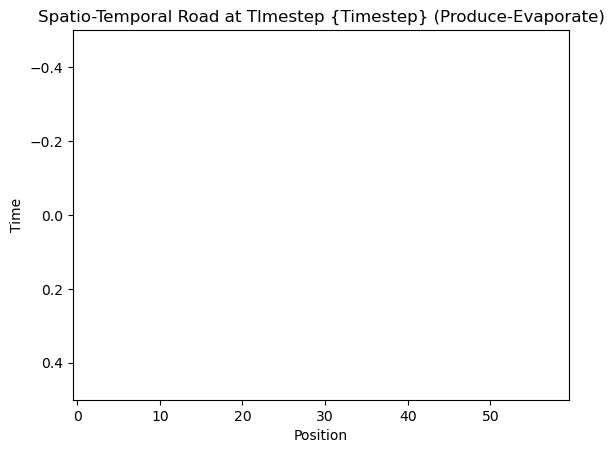

Cars:
Position: 0, Speed: 4, Length:5

Time step: 2


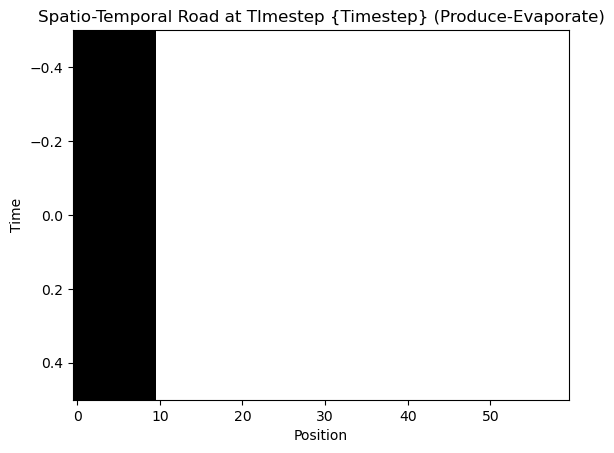

TypeError: 'NoneType' object is not callable

In [143]:
#Iterate over N timesteps
N=30
for i in range(N):
    print("Time step:", i+1)
    road.visualize()
    road.update()

    #Access information of each vehicle
    print("Cars:")
    for car in road.cars:
        print(f"Position: {car.position}, Speed: {car.speed}, Length:{car.length}")

    print()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Car:
    def __init__(self, position, speed, max_speed, length, width, randomization):
        self.position = position
        self.speed = speed
        self.max_speed = max_speed
        self.length = length
        self.width = width
        self.randomization = randomization
        self.headway_distance = None  # Initialize headway distance as None

    def calculate_headway_distance(self, cars):
        # Calculate headway distance based on positions of other cars
        next_car_position = min((v.position for v in cars if v.position > self.position), default=np.inf)
        self.headway_distance = next_car_position - self.position - 1 if next_car_position != np.inf else np.inf

    def accelerate(self):
        if self.speed < self.max_speed:
            self.speed += 1

    def decelerate(self):
        if self.speed > self.headway_distance:
            self.speed = self.headway_distance  # reduce speed equivalent only to headway distance

    def random_brake(self):
        if np.random.random() < self.randomization and self.speed > 0:
            self.speed -= 1

class Road:
    def __init__(self, length, max_speed, production_prob):
        self.length = length  # length of the road
        self.max_speed = max_speed  # speed limit of the road
        self.production_prob = production_prob
        self.cars = []  # empty array to denote empty road configuration at the start

    def add_car(self, car):
        self.cars.append(car)

    def remove_cars(self):
        self.cars = [car for car in self.cars if car.position != self.length - 1]

    def update(self):
        for car in self.cars:
            car.calculate_headway_distance(self.cars)  # Calculate headway distance for each car
            car.accelerate()
            car.decelerate()
            car.position += car.speed  # Forward Movement
        self.remove_cars()

        # Produce new cars
        if np.random.rand() < self.production_prob:
            length = np.random.choice([1, 2, 5, 9])
            if length == 1:
                car_width = 1
            else:
                car_width = 2
            new_car = Car(0, np.random.randint(1, self.max_speed + 1), self.max_speed, length, car_width, 0.3)
            self.add_car(new_car)

class Controller:
    def __init__(self, road, steps):
        self.road = road
        self.steps = steps

    def simulate(self):
        for i in range(self.steps):
            print("Time step:", i + 1)
            self.road.visualize()
            self.road.update()

            # Access information of each vehicle
            print("Cars:")
            for car in self.road.cars:
                print(f"Position: {car.position}, Speed: {car.speed}, Length: {car.length}")

            print()

    def visualize(self):
        road_state = np.zeros((self.road.length, 2), dtype=int)  # Generates zeros representing empty road configuration
        for car in self.road.cars:
            for i in range(car.width):
                road_state[car.position: car.position + car.length, i] = 1  # Assigns value of 1 for occupied positions

        plt.imshow(road_state.reshape(1, -1), cmap="binary", aspect="auto")
        plt.title("Spatio-Temporal Road")
        plt.xlabel("Position")
        plt.ylabel("Time")
        plt.show()

# Example usage
road = Road(length=100, max_speed=5, production_prob=0.3)
controller = Controller(road, steps=30)
controller.simulate()

Time step: 1


AttributeError: 'Road' object has no attribute 'visualize'